In [1]:
import gdown
import os
import  requests, zipfile

In [2]:
 # Подключение Google Диска https://drive.google.com/file/d/1GNo8Kd3GyzPnmwBLCd5gdyRcVbnSQJIh/view?usp=sharing
f_1 = '1GNo8Kd3GyzPnmwBLCd5gdyRcVbnSQJIh'# нужна только эта часть ссылки
gdown.download(f'https://drive.google.com/uc?id={f_1}', None, quiet=True)

'drive-download-20231112T203831Z-001.zip'

In [5]:
# Разархивация датасета в директорию 'content/img'
# !unzip -qo "images.zip" -d /content/img # Код, c  информационными файлами
!unzip -qo -x "drive-download-20231112T203831Z-001.zip" -d /content/img # Код, без информационных файлов

In [6]:
IMAGE_PATH = '/content/img/'
# Получаем список файлов в директории
files = os.listdir(IMAGE_PATH)
# Составляем список путей к файлам
files_paths = [os.path.join(IMAGE_PATH, file) for file in files]
print(len(files_paths))
files_paths[1]

100


'/content/img/3045.png'

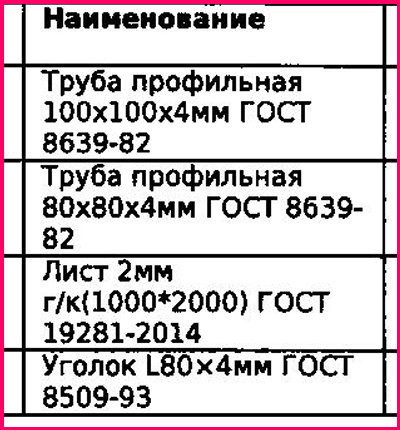

In [25]:
import cv2
from google.colab.patches import cv2_imshow
# Укажите путь к изображению
image_path = '/content/img/3012.png'

# Загрузите изображение с помощью OpenCV
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Укажите координаты области, которую вы хотите обрезать
x = 310  # координата x верхнего левого угла
y = 950  # координата y верхнего левого угла
width = 400 # ширина области
height = 430  # высота области
# добавляем прямоугрльник на изображение
imageRect = cv2.rectangle(image,
                          pt1 = (x,y),
                          pt2 = (x+width,y+height),
                          color = (100, 0, 255),
                          thickness = 5)

# Обрежьте изображение с помощью указанных координат и размеров
cropped_image = image[y:y+height, x:x+width]

# Отобразите обрезанное изображение
cv2_imshow(cropped_image)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 11 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,071 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

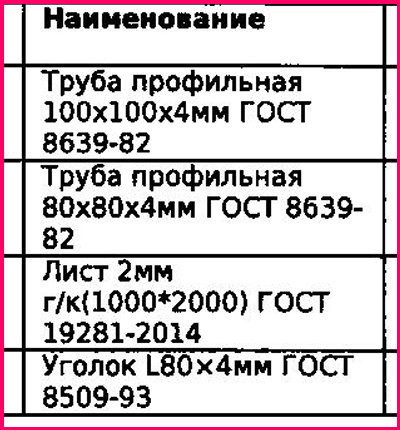

In [28]:

!pip install pytesseract
!apt-get install tesseract-ocr

!wget https://github.com/tesseract-ocr/tessdata/raw/main/rus.traineddata -P /usr/share/tesseract-ocr/4.00/tessdata/

import os
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata/'

import cv2
import pytesseract
from google.colab.patches import cv2_imshow

# # Загрузите изображение таблицы
# image_path = 'путь_к_изображению.jpg'
# image = cv2.imread(image_path)

# Преобразуйте изображение в черно-белый формат
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Используйте Tesseract OCR для распознавания текста
extracted_data = pytesseract.image_to_string(gray_image, lang='rus')

# Выведите распознанный текст
print(extracted_data)

# Отобразите изображение
cv2_imshow(cropped_image)

In [29]:
# # Загрузите изображение черно-белой таблички
# image_path = 'путь_к_изображению.jpg'
# image = cv2.imread(image_path, 0)  # Загрузите изображение в оттенках серого

# Используйте Tesseract OCR для распознавания текста
extracted_data = pytesseract.image_to_string(cropped_image, lang='rus')

# Разделите распознанный текст на строки
lines = extracted_data.split('\n')

# Выведите текст построчно
for line in lines:
    print(line)

Труба профильная
100х100х4мм ГОСТ
8639-82

| Труба профильная |

80х80х4мм ГОСТ 8639-

г/к( 1000*2000) ГОСТ
19281-2014

Уголок |80х4мм ГОСТ |
8509-93

 



Почему-то некоторые строчки игнорит Лист не распознал